<a href="https://colab.research.google.com/github/anyelove/Synthesized-Voice-Formant-Classification/blob/main/Conv1D_ReLU_f2_v2_500.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')




Mounted at /content/drive


In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import librosa, librosa.display
import seaborn as sns
import matplotlib.pyplot as plt
from random import random
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Reshape, Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import tensorflow.keras as keras
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
# https://drive.google.com/file/d/10HwWvkda4YsGoU3g1lnN5fGjRD0PZmlJ/view?usp=drive_link  lpc vowel /a/
# https://drive.google.com/file/d/1vbqxbeMCDqQwxBBSwMO0BQkVpjx0wpre/view?usp=drive_link  lpc vowel /e/
# https://drive.google.com/file/d/1o5eNcAn-trAWU5zfG_0GR7yi9LXcQGj8/view?usp=drive_link  lpc vowel /i/
# https://drive.google.com/file/d/1EmiEfHDJLkbXGXtf7EY5F1sbi2xQ-Q66/view?usp=drive_link  lpc vowel /o/
# https://drive.google.com/file/d/1yg4kTVrRhLc5XsQrkxdvod8nvUF9BLuO/view?usp=drive_link  lpc vowel /u/
# https://drive.google.com/file/d/1T_kqPh8Uwu1Sm9JY8Od4J4nchXi-bDbi/view?usp=drive_link  class f1, f2. Vowel /a/
# https://drive.google.com/file/d/17J3wytG61m92MGt_B_hQaBbBqG1MmUNR/view?usp=drive_link  class f1, f2. Vowel /e/
# https://drive.google.com/file/d/1N4lmEJmAH7WC5w55QEppyS2vgFPtUk7P/view?usp=drive_link  class f1, f2. Vowel /i/
# https://drive.google.com/file/d/1U9M1C4Bj6W5PWrqWQ4jUaPi4I6BhiS-g/view?usp=drive_link  class f1, f2. Vowel /o/
# https://drive.google.com/file/d/1i9PNuYq_NU7aeQqpxOcCPziRpeqbuPrU/view?usp=drive_link  class f1, f2. Vowel /u/
# https://drive.google.com/file/d/1R6O3NL1Xs7JXdOG0PYH6YoP93xg-BOVe/view?usp=drive_link  mapping of classes

lpc_url1 = 'https://drive.google.com/uc?id={}'.format('10HwWvkda4YsGoU3g1lnN5fGjRD0PZmlJ')
lpc_url2 = 'https://drive.google.com/uc?id={}'.format('1vbqxbeMCDqQwxBBSwMO0BQkVpjx0wpre')
lpc_url3 = 'https://drive.google.com/uc?id={}'.format('1o5eNcAn-trAWU5zfG_0GR7yi9LXcQGj8')
lpc_url4 = 'https://drive.google.com/uc?id={}'.format('1EmiEfHDJLkbXGXtf7EY5F1sbi2xQ-Q66')
lpc_url5 = 'https://drive.google.com/uc?id={}'.format('1yg4kTVrRhLc5XsQrkxdvod8nvUF9BLuO')

url_f1_f2_a = 'https://drive.google.com/uc?id={}'.format('1T_kqPh8Uwu1Sm9JY8Od4J4nchXi-bDbi')
url_f1_f2_e = 'https://drive.google.com/uc?id={}'.format('17J3wytG61m92MGt_B_hQaBbBqG1MmUNR')
url_f1_f2_i = 'https://drive.google.com/uc?id={}'.format('1N4lmEJmAH7WC5w55QEppyS2vgFPtUk7P')
url_f1_f2_o = 'https://drive.google.com/uc?id={}'.format('1U9M1C4Bj6W5PWrqWQ4jUaPi4I6BhiS-g')
url_f1_f2_u = 'https://drive.google.com/uc?id={}'.format('1i9PNuYq_NU7aeQqpxOcCPziRpeqbuPrU')

mapping = 'https://drive.google.com/uc?id={}'.format('1R6O3NL1Xs7JXdOG0PYH6YoP93xg-BOVe')
# df = pd.read_csv(url, header=None)

In [ ]:
# Leyendo archivos
class_f0_f1_a = pd.read_csv(url_f1_f2_a, header=None).values
class_f0_f1_e = pd.read_csv(url_f1_f2_e, header=None).values
class_f0_f1_i = pd.read_csv(url_f1_f2_i, header=None).values
class_f0_f1_o = pd.read_csv(url_f1_f2_o, header=None).values
class_f0_f1_u = pd.read_csv(url_f1_f2_u, header=None).values

mapping_class = pd.read_csv(mapping, header=None).values
mapping_class = mapping_class[..., np.newaxis]

In [ ]:
# Leyendo archivos
lpc_signal_1_avoice = pd.read_csv(lpc_url1, header=None).values
lpc_signal_1_evoice = pd.read_csv(lpc_url2, header=None).values
lpc_signal_1_ivoice = pd.read_csv(lpc_url3, header=None).values
lpc_signal_1_ovoice = pd.read_csv(lpc_url4, header=None).values
lpc_signal_1_uvoice = pd.read_csv(lpc_url5, header=None).values

In [ ]:
class_labels = np.transpose(np.concatenate((class_f0_f1_a,class_f0_f1_e,class_f0_f1_i,class_f0_f1_o,class_f0_f1_u), axis=1))
samples = np.concatenate((lpc_signal_1_avoice,lpc_signal_1_evoice,lpc_signal_1_ivoice,lpc_signal_1_ovoice,lpc_signal_1_uvoice), axis=0)

In [ ]:
X = samples
y = class_labels[:,1]

In [ ]:
def prepare_datasets(test_size, validation_size):

    # load data

    # create train/test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)


    # create train/validation split
    X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=validation_size)

    #
    X_train = X_train[..., np.newaxis] #
    X_validation = X_validation[..., np.newaxis]
    X_test = X_test[..., np.newaxis]
    return X_train, X_validation, X_test, y_train, y_validation, y_test

model = tf.keras.Sequential([
    tf.keras.layers.Reshape((26, 1), input_shape=(26,)),  # Reshape input for convolution
    tf.keras.layers.Conv1D(32, 3, activation="relu", padding="same"),
    tf.keras.layers.MaxPooling1D(2),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Conv1D(64, 3, activation="relu", padding="same"),
    tf.keras.layers.MaxPooling1D(2),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(22, activation="softmax")
])

def plot_history(history):

    fig, axs = plt.subplots()

    # create error subplot
    axs.plot(history.history['loss'], label="train error")
    axs.plot(history.history['val_loss'], label="test error")
    axs.set_ylabel("Error")
    axs.set_xlabel("Epoch")
    axs.legend(loc="upper right")
    axs.set_title("Error eval")

    plt.show()


In [ ]:
X_train, X_validation, X_test, y_train, y_validation, y_test = prepare_datasets(0.2, 0.3)
optimizer = Adam(learning_rate=0.001)

model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
model.summary()
history = model.fit(X_train, y_train, epochs=500, batch_size=32, validation_data=(X_test, y_test))
# early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape_1 (Reshape)         (None, 26, 1)             0         
                                                                 
 conv1d_2 (Conv1D)           (None, 26, 32)            128       
                                                                 
 max_pooling1d_2 (MaxPoolin  (None, 13, 32)            0         
 g1D)                                                            
                                                                 
 dropout_3 (Dropout)         (None, 13, 32)            0         
                                                                 
 conv1d_3 (Conv1D)           (None, 13, 64)            6208      
                                                                 
 max_pooling1d_3 (MaxPoolin  (None, 6, 64)             0         
 g1D)                                                 

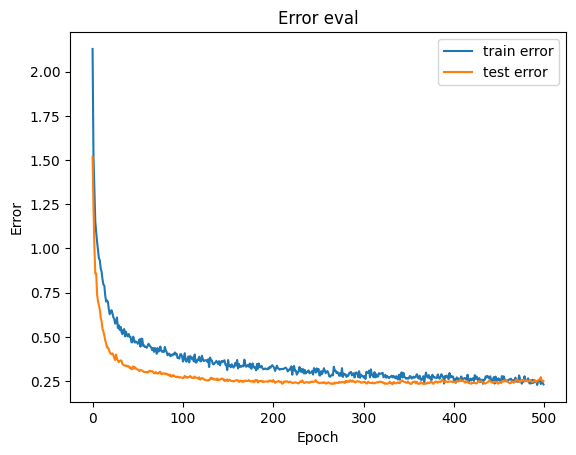


Model evaluation:
13/13 [==============================] - 0s 3ms/step - loss: 0.2503 - accuracy: 0.9150


[0.2502713203430176, 0.9150000214576721]

In [ ]:
plot_history(history)

# evaluate model
print("\nModel evaluation:")
model.evaluate(X_test, y_test, verbose=1)

In [ ]:
# make predictions
y_pred = model.predict(X_validation)
#decoded_y_pred = tf.argmax(y_pred).numpy()
#print()"\ny_pred[0] = :")
#print(y_pred[0])
#print(tf.argmax(y_pred[0].numpy()))
#print(decoded_y_pred)

# pasar probabilidades a numeros de clase



15/15 [==============================] - 0s 2ms/step
[5.31793224e-25 2.00334950e-23 1.82732194e-24 2.84404176e-25
 1.61712758e-24 5.08409652e-24 5.41323137e-24 5.31981910e-25
 1.91140425e-24 2.26996145e-24 8.98818057e-25 2.61214151e-24
 3.37182176e-25 1.86668531e-24 8.01852595e-12 1.23685125e-11
 3.93178084e-13 2.84502062e-16 4.37536049e-11 5.11967919e-05
 9.92657483e-01 7.29120849e-03]


<tf.Tensor: shape=(480,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True, False,  True, False,  True,
        True, False,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True, False,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  Tr

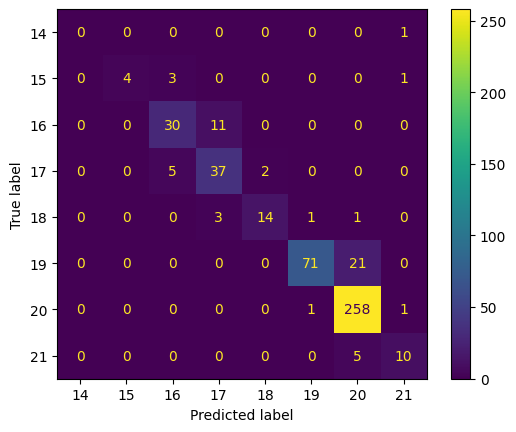

In [ ]:
#print(y_pred[0])
#print(tf.argmax(y_pred,1).numpy())
y_pred_class = tf.argmax(y_pred,1).numpy()
#print(y_pred_class)

#print(y_pred[300])
#print(tf.argmax(y_pred[300]).numpy())
ConfusionMatrixDisplay.from_predictions(y_validation, y_pred_class)
tf.equal(y_validation, y_pred_class)

In [ ]:
# Metrics
accuracy = accuracy_score(y_validation, y_pred_class)
precision = precision_score(y_validation, y_pred_class, average='weighted')
recall = recall_score(y_validation, y_pred_class, average='weighted')
f1 = f1_score(y_validation, y_pred_class, average='weighted')
#print(y_pred)

#print(f1)
#print(precision)
#print(recall)
print("\nAccuracy:")
print(accuracy)


Accuracy:
0.8833333333333333


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Class-Distance Metric
vec_dif = y_validation - y_pred_class
vec_err_abs = np.absolute(vec_dif)
vec_sum_abs = vec_err_abs.sum(axis=0)
vec_sum = vec_dif.sum(axis=0)

length_vec = len(vec_dif)

correct_preds = precision * length_vec
print("\nCantidad de predicciones correctas:")
print(correct_preds)

print("\nTotal de Predicciones:")
print(length_vec)

print("Suma de Errores:")
print(vec_sum)

print("Suma de Error Absoluto:")
print(vec_sum_abs)

print('Vector Diferencia de predicciones:')
print(vec_dif)

425.3013243259702
480
-40
68
[ 0  0  0  0  0 -1  0  1  0  0 -1  0  0  0  0  0  0 -1  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0
  0  0  0  0  0  0  0  0  0 -1  0  1  0  0  0  0  0  0  0 -1  0  0  0  0
 -1  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0 -1  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  1  0  0  0  0  0  0  0
 -1  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  1
  0  0  0  0  0  1  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0 -1  0  0 -1  0  0  0  0 -1  0  0  0  0  0  0  0  0  0
  0  0  0 -1  0  0  0  0  0 -1  0  0 -1  0  0 -1  0  0  0  0  0  0 -1  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  1
  0  0  0  0  0 -1  0  0  0  0  0 -1  1  0  0  0  0  0  0  0  0  0  0  0
 -1  0  0  0  0 -1  0  0  0 -1  0  0 -1  0  0 -1  0  0  0  0  1  0  0  0
  0  0  1  0  0 -1  0 

In [ ]:
# https://drive.google.com/file/d/1njeU7m7r9ZFQ1HbY487IzGeyvqbwO1WA/view?usp=drive_link real vowels

lpc_REALurl1 = 'https://drive.google.com/uc?id={}'.format('1njeU7m7r9ZFQ1HbY487IzGeyvqbwO1WA')
lpc_REALvowels = pd.read_csv(lpc_REALurl1, header=None).values

lpc_REALvowels = lpc_REALvowels[..., np.newaxis]

REAL_pred = model.predict(lpc_REALvowels)

REALvowels_pred_class = tf.argmax(REAL_pred,1).numpy()
print(REALvowels_pred_class)
print(mapping_class)
#print(y_pred[300])
#print(tf.argmax(y_pred[300]).numpy())

1/1 [==============================] - 1s 723ms/step
[15 18 18 20 20]
[[[  31.25 ]
  [  39.373]
  [  49.606]
  [  62.5  ]
  [  78.745]
  [  99.213]
  [ 125.   ]
  [ 157.49 ]
  [ 198.43 ]
  [ 250.   ]
  [ 314.98 ]
  [ 396.85 ]
  [ 500.   ]
  [ 629.96 ]
  [ 793.7  ]
  [1000.   ]
  [1259.9  ]
  [1587.4  ]
  [2000.   ]
  [2519.8  ]
  [3174.8  ]
  [4000.   ]]]


In [ ]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y
